# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [ ]:
# If you are running this on your local computer, wet your workign directory to 
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer. 
#setwd("~/Documents/PittCMU/G3/DSPN/DataSciencePsychNeuro/Homeworks/hcp_data")

# If you are running this on Colab, then use something like this.
system("gdown --id 1hywRmGdvhbDYTrQRyl1_bLJsq-T3GJq2")

# INSERT CODE HERE
library(tidyverse)

d <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')

d1 <- d %>%
  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
  drop_na()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

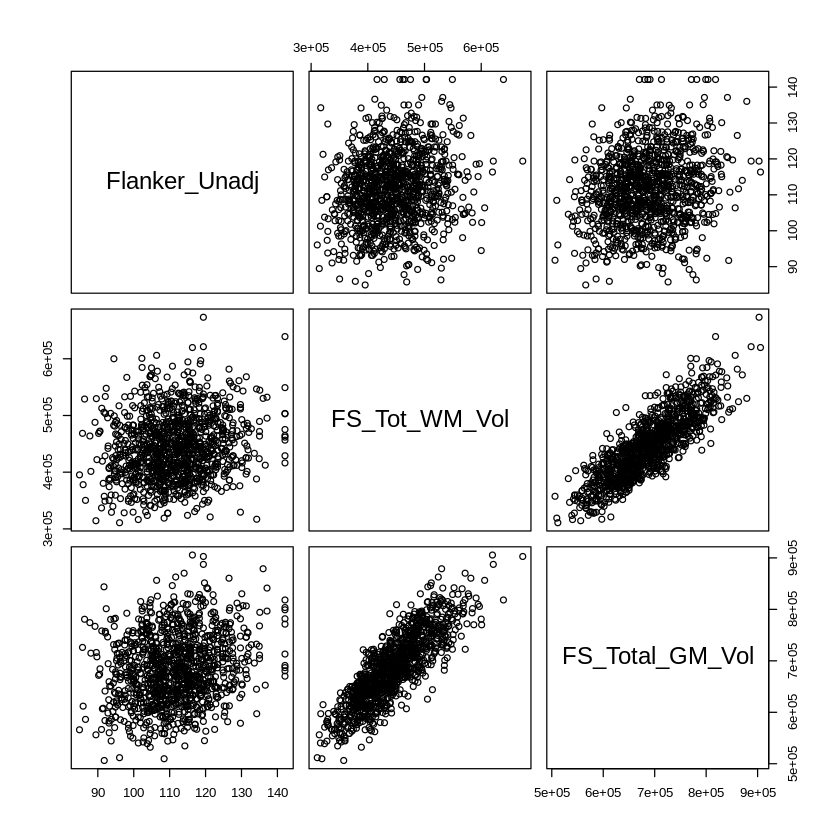

In [ ]:
#INSERT CODE HERE
pairs(~ Flanker_Unadj + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1)

> The total white matter volume (FS_Tot_WM_Vol) and total grey matter volume (FS_Total_GM_Vol) are strongly positively correlated with each other. Flanker task performance (Flanker_Unadj) does not appear to be correlated with either total grey matter or total white matter volumes.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [ ]:
#INSERT CODE HERE

# Run Linear Model
mdl <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(mdl)

# Extract mean coefficient values 
coefficients <- coef(mdl)

# Report 95% confidence intervals
CI <- confint(mdl)

coefficients
CI


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> The fitted model (Flanker ~ Grey Matter) demonstrates that grey matter volume is significantly associated with flanker task performance at an alpha level of .001. mean coefficient values of B0 = 90.256 and B1 = 3.110 x 10^-5. The 95% CI's (see above table) do not include 0 for grey matter volume.
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula = 'y ~ x'


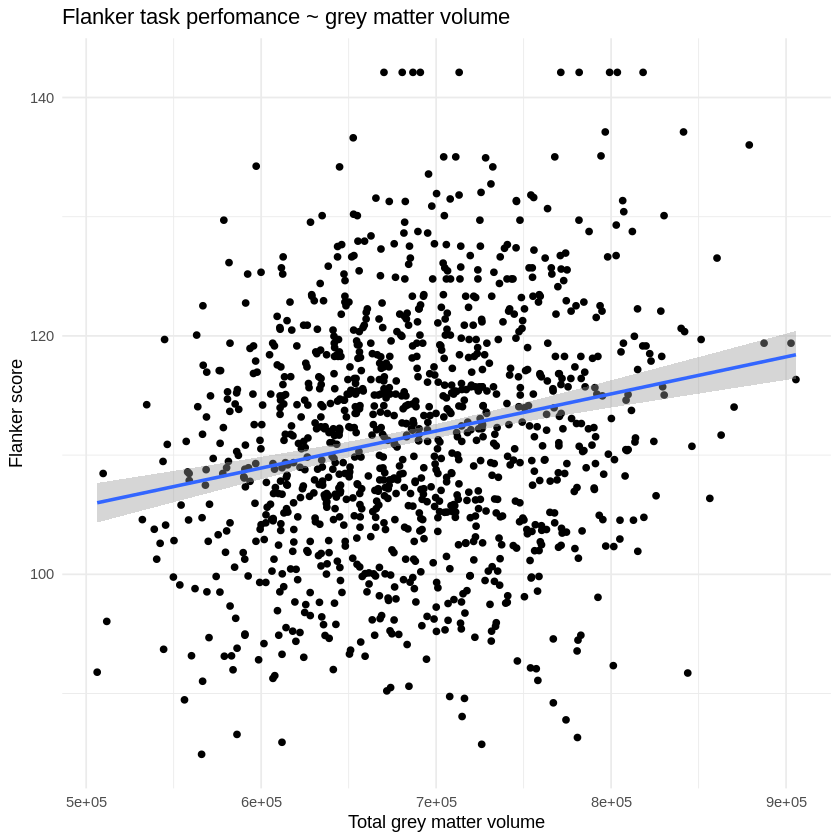

In [ ]:
#INSERT CODE HERE
regplot <- ggplot(d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  theme_minimal() +
  labs(title = "Flanker task perfomance ~ grey matter volume", y = 'Flanker score', x = 'Total grey matter volume')

regplot

> The association between total grey matter volume and flanker task performance is not particularly clear based on the scatterplot. A visualization of the regression line with 95% CI makes it clear that higher total grey matter volume is associated with higher flanker task performance, though the association does not appear to be particularly strong.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> Based on the analyses conducted above, I would conclude that the linear regression model employed in the assignment demonstrates the advantage of using a less flexible model to predict the relationship between these variables. From the scatterplot, it seems likely that a more flexible model would overfit this data, resulting in a high-variance, low-bias model. The results of the linear model on the data suggest a small increase in flanker performance (3.110 x 10^-5) in response to a unit increase in total grey matter volume. Based on the coefficient of determination (R2 = 0.043), total grey matter volume only accounts for approximately 4% of the variance in flanker score.

**DUE:** 5pm EST, February 27, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*